<a href="https://colab.research.google.com/github/AyeshaAmir55/Assignment-2/blob/main/Assignmnet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Ayesha Amir
Reg no: FA24-RAI-004




Paper Selection I have selected the research paper titled "Hybrid Predictive Models: When an Interpretable Model Collaborates with a Black-box Model", published in a W category journal according to HJRS. The paper provides a detailed description of the dataset, problem statement, and methodology for model development, along with the availability of code and dataset for implementation. Paper Link:https://jmlr.org/papers/v22/19-325.html Code Link:https://github.com/wangtongada/HyRS Dataset Link:https://drive.google.com/uc?id=1cLHnV4i76jY4t5-dvZuXwntO5G3gYnJ0

Introduction and Objectives
Hybrid predictive models aim to strike a balance between interpretability and accuracy by integrating an interpretable model with a pre-trained black-box model. This approach leverages the strengths of both types of models: the interpretable model ensures transparency and clarity in its predictions, while the black-box model excels in handling complex patterns in the data. The interpretable model is optimized to handle specific data segments where it performs best, enhancing accuracy without compromising on interpretability.

Objectives

Building on this work, I aim to Check the accuracy of model using K-Nearest Neighbors (KNN) as a partially interpretable model and compare accuracy with the proposed hybrid mode.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv('/data_cardiovascular_risk.csv')

Exploratory Data Analysis

In [ ]:
data.shape

(3390, 17)

In [ ]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
data.types

Univariate Analysis

<ipython-input-13-4df4066fe02c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='glucose',data=data,palette='rainbow')


<Axes: xlabel='glucose', ylabel='count'>

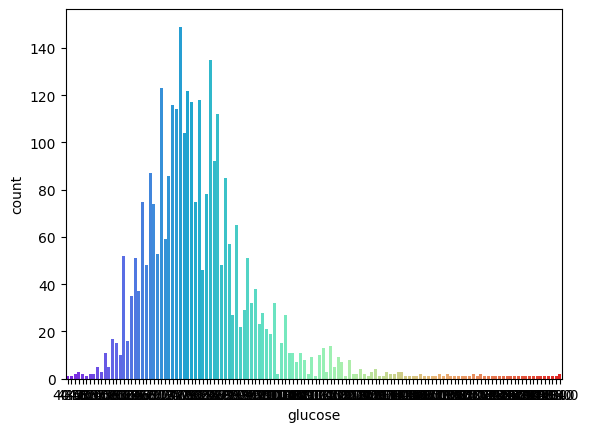

In [ ]:
sns.countplot(x='glucose',data=data,palette='rainbow')

<Axes: xlabel='glucose', ylabel='count'>

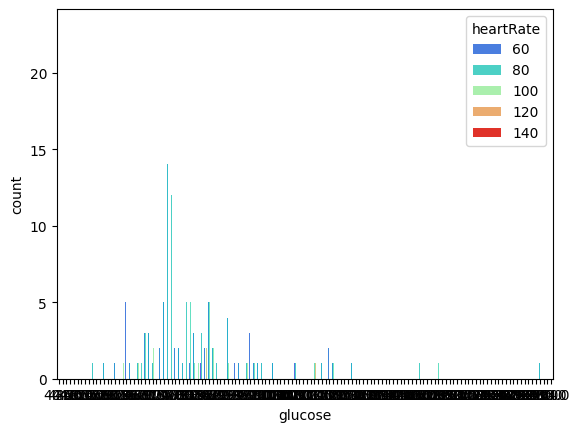

In [ ]:
sns.countplot(x='glucose',hue='heartRate',data=data,palette='rainbow')

<Axes: xlabel='glucose', ylabel='count'>

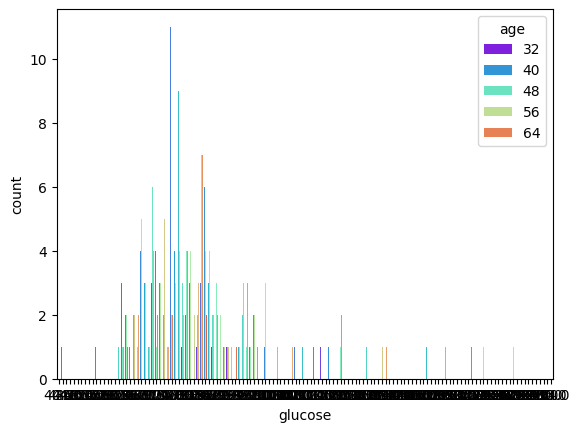

In [ ]:
sns.countplot(x='glucose',hue='age',data=data,palette='rainbow')

<Axes: ylabel='heartRate'>

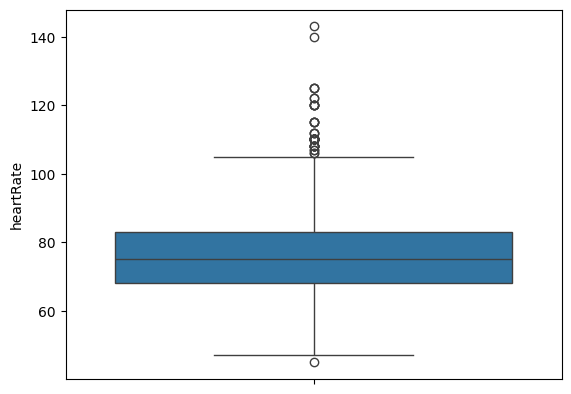

In [ ]:
sns.boxplot(y='heartRate', data=data)

Bivariate Analysis

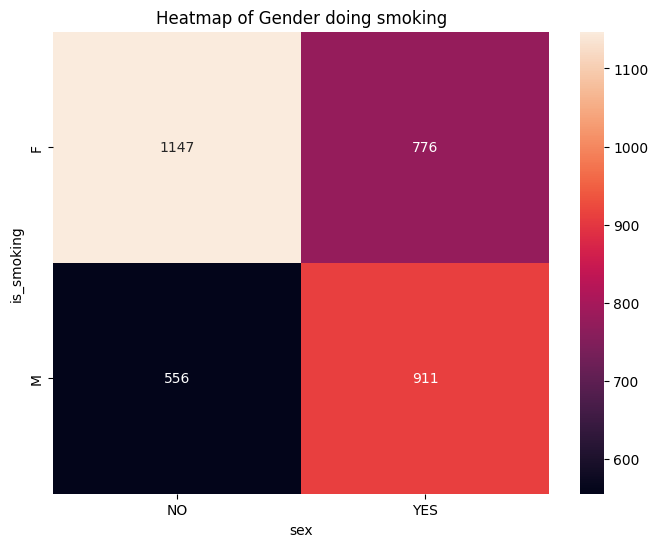

In [ ]:
ct=pd.crosstab(data['sex'], data['is_smoking'])
plt.figure(figsize=(8, 6))
sns.heatmap(ct,annot=True,fmt='d')
plt.title('Heatmap of Gender doing smoking')
plt.xlabel('sex')
plt.ylabel('is_smoking')
plt.show()

<Axes: xlabel='glucose', ylabel='diaBP'>

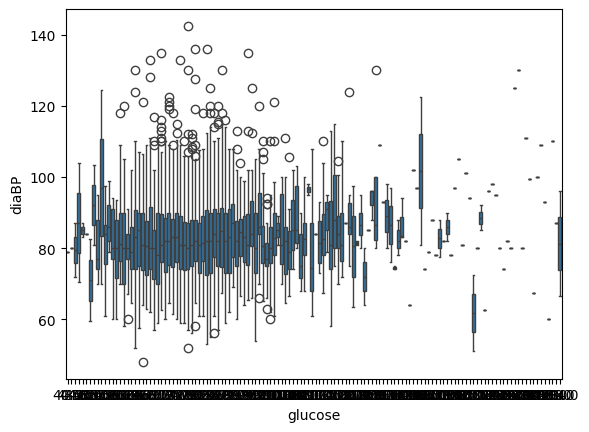

In [ ]:
sns.boxplot(y='diaBP', x='glucose', data=data)

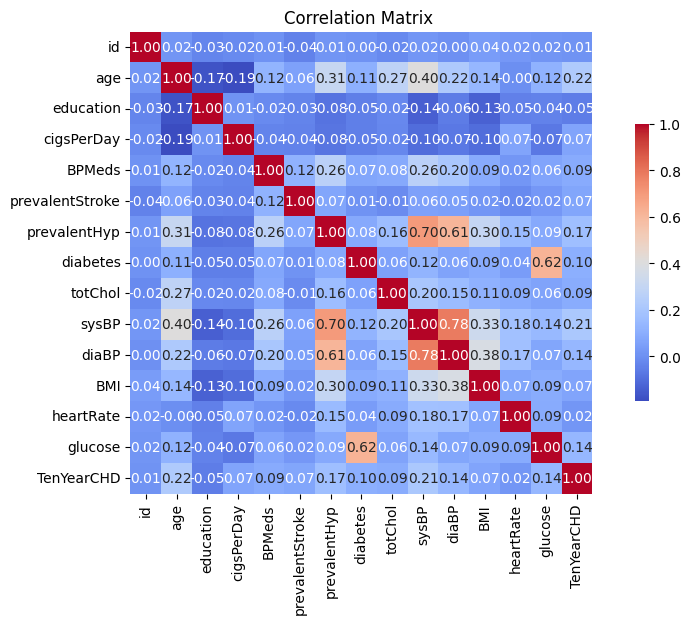

In [ ]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(11, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .6})
plt.title('Correlation Matrix ')
plt.show()

Multivariate Analysis

<Axes: xlabel='sex', ylabel='heartRate'>

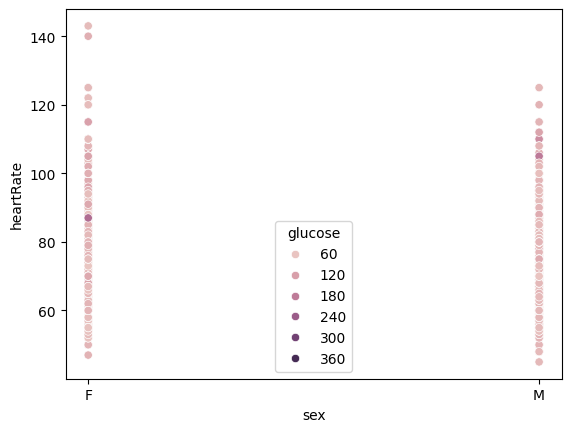

In [ ]:
sns.scatterplot(x='sex', y='heartRate', hue='glucose', data=data)

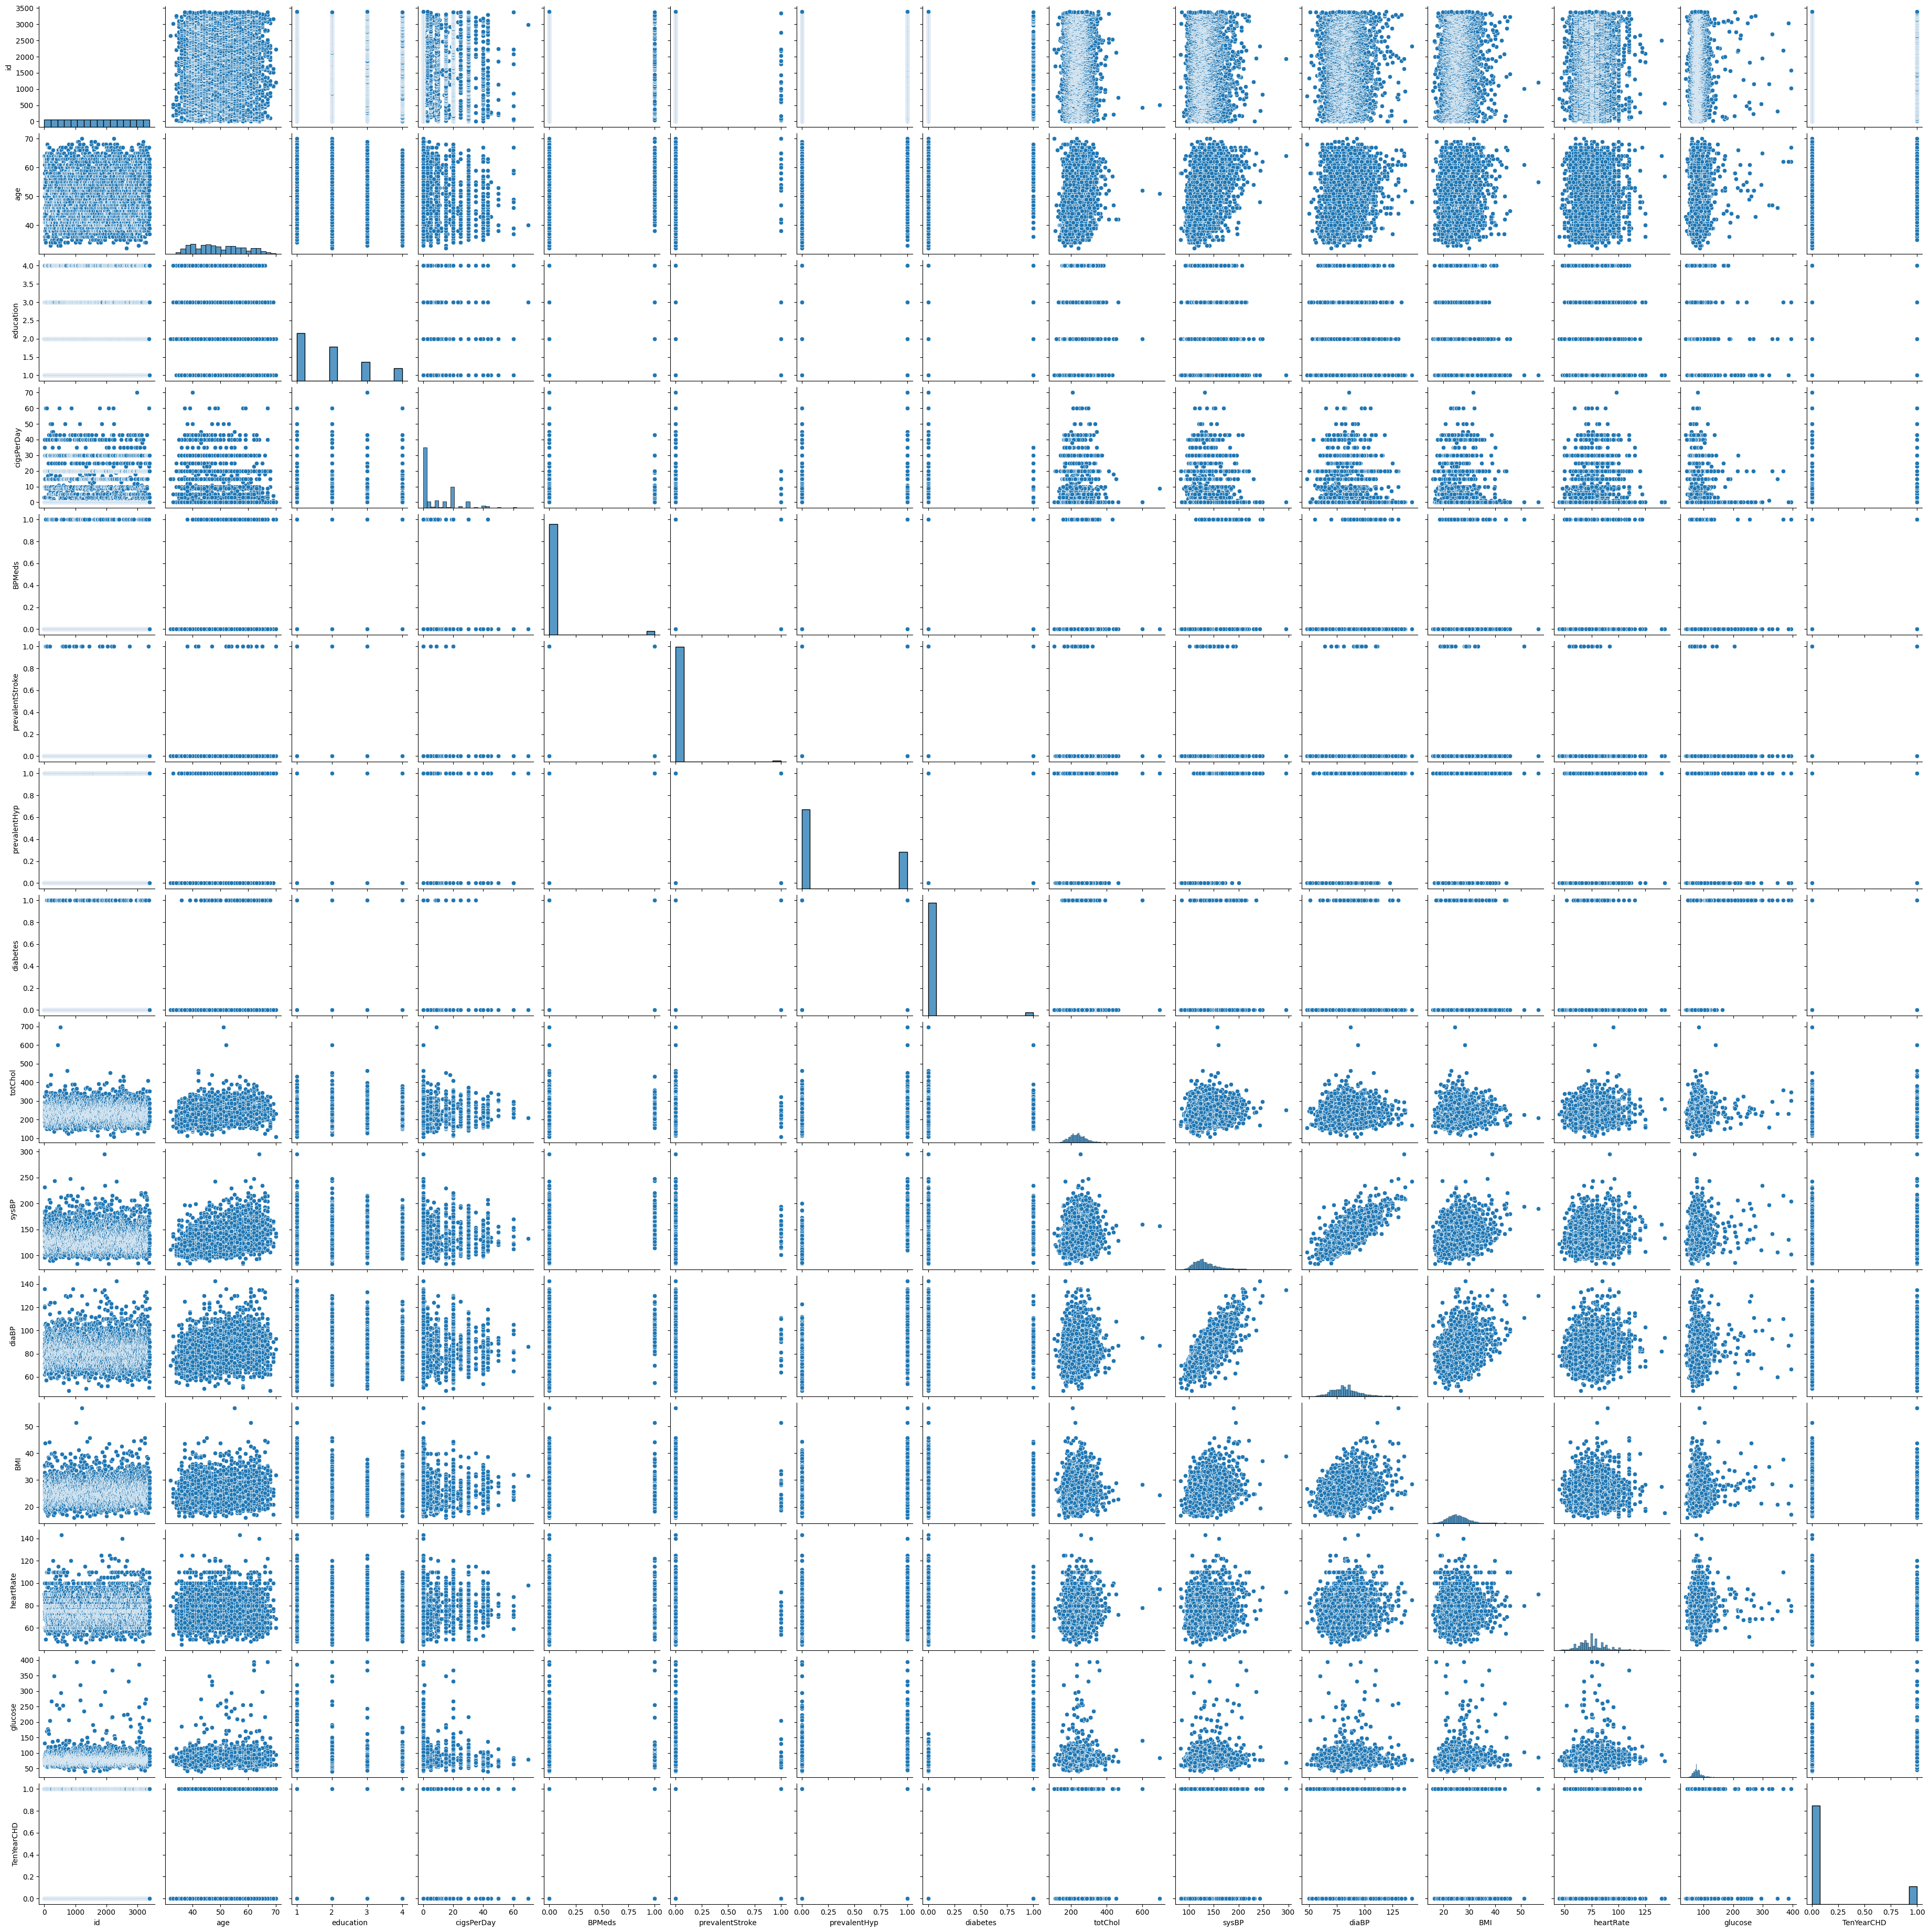

In [ ]:
sns.pairplot(data)

Data Imputation and Transformation

In [ ]:
data.drop(columns=['id'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
data.isnull().sum()

,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,38


*We need to impute data in those missing columns and also convert SEX and IS_SMOKING columns to Numerical data *

In [ ]:
# Custom Transformer Class for Imputation
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, column, strategy="mean"):
        self.column = column
        self.strategy = strategy

    def fit(self, X, y=None):
        if self.strategy == "mean":
            self.value = X[self.column].mean()
        elif self.strategy == "mode":
            self.value = X[self.column].mode()[0]
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X[self.column] = X[self.column].fillna(self.value)
        return X

# Build the full pipeline
def create_pipeline():
    # Imputation for specific columns
    imputation_pipeline = Pipeline(steps=[
        ('impute_glucose', Imputer(column='glucose', strategy="mean")),
        ('impute_education', Imputer(column='education', strategy="mode")),
        ('impute_BPMeds', Imputer(column='BPMeds', strategy="mode")),
        ('impute_totChol', Imputer(column='totChol', strategy="mean")),
        ('impute_cigsPerDay', Imputer(column='cigsPerDay', strategy="mean")),
        ('impute_BMI', Imputer(column='BMI', strategy="mean")),
        ('impute_heartRate', Imputer(column='heartRate', strategy="mean"))
    ])

    # One-hot encoding for `sex` and `is_smoking`
    categorical_transformer = ColumnTransformer(
        transformers=[
            ('sex_encoder', OneHotEncoder(drop='first', sparse_output=False), ['sex']),  # Binary encoding: F -> 0, M -> 1
            ('is_smoking_encoder', OneHotEncoder(drop='first', sparse_output=False), ['is_smoking'])  # Binary encoding: No -> 0, Yes -> 1
        ],
        remainder='passthrough'  # Pass through the rest of the columns unchanged
    )

    # Combine imputation and encoding into a single pipeline
    full_pipeline = Pipeline(steps=[
        ('imputations', imputation_pipeline),
        ('categorical_encoding', categorical_transformer)
    ])

    return full_pipeline

# Apply the pipeline directly on the dataset
pipeline = create_pipeline()

# Ensure the pipeline works directly on 'data'
data_transformed = pipeline.fit_transform(data)

# Create column names for the transformed data
categorical_columns = ['sex_encoded', 'is_smoking_encoded']
numeric_columns = list(data.drop(columns=['sex', 'is_smoking']).columns)
column_names = categorical_columns + numeric_columns

# Convert back to DataFrame
data_transformed_df = pd.DataFrame(data_transformed, columns=column_names)

In [ ]:
data_transformed_df.isnull().sum()

,0
sex_encoded,0
is_smoking_encoded,0
age,0
education,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
data_transformed_df.head()

,sex_encoded,is_smoking_encoded,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,1.0,64.0,2.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,25.794964,90.0,80.0,1.0
1,1.0,0.0,36.0,4.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.770000,72.0,75.0,0.0
2,0.0,1.0,46.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0.0
3,1.0,1.0,50.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.260000,68.0,94.0,1.0
4,0.0,1.0,64.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0.0


In [ ]:
data_transformed_df.dtypes

ML Model Implementation uisng KNN

In [51]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Define Features (X) and Target (y)
# Here we are assuming you have a DataFrame called data_transformed_df
X = data_transformed_df[['age', 'education', 'sex_encoded', 'is_smoking_encoded', 'cigsPerDay', 'BPMeds',
                         'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = data_transformed_df[['glucose']]  # Target variable (continuous)

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (Optional but recommended for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train data and transform
X_test_scaled = scaler.transform(X_test)        # Only transform the test data (do not fit again)

# Step 4: Train the KNN Regressor Model
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors based on tuning
knn.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data

# Step 5: Make Predictions
y_pred = knn.predict(X_test_scaled)  # Predict using the scaled test data

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")



Model Performance:
Mean Absolute Error (MAE): 7.5660
Mean Squared Error (MSE): 118.4918
R-squared: 0.7600
